## In-class notebook : Decision tree visualization and hyperparameter tuning

In this notebook, we will learn how to visualize a trained decision tree classifier. We will also manually tune the `hyperparameters` of the tree and visualize the results of that tuning. 

First we will run this cell that improrts the required libraries for this exercise. We will be using a python package called pydotplus. Make sure you install this in your python distribution. You will also have to download the graphviz software [https://graphviz.gitlab.io/download/]. 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


To ensure that your graphviz executables are added to your PATH variable, please run the following cell. Replace the RHS of graphviz_path with your actual path to the Graphviz bin.

In [100]:
import os
graphviz_path = 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + graphviz_path

In [101]:
df = pd.read_csv('data/residency.csv')
df = df.drop('Unnamed: 0',axis=1)
y = df['Residency']
X= df.drop('Residency',axis=1)
df.head()

,Age,Salary,Degree,Residency
0,24,40000,1,1
1,53,52000,0,0
2,23,25000,1,0
3,25,77000,1,1
4,32,48000,0,1


In [102]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

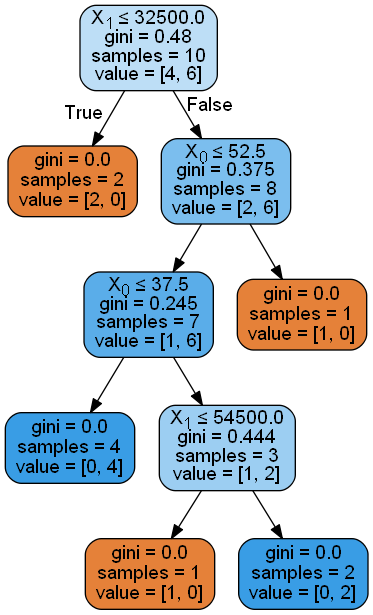

In [103]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(133.92000000000002, 195.696, 'X[1] <= 32500.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(200.88000000000002, 152.208, 'X[0] <= 52.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 37.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(200.88000000000002, 65.232, 'X[1] <= 54500.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

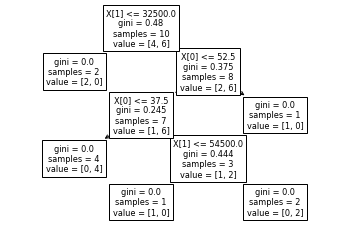

In [104]:
 ### There is another way to make the tree graph, but the visualization process is similar (we use export_graphviz)
from sklearn import tree
tree.plot_tree(clf.fit(X, y))

In [105]:

# dot_data = tree.export_graphviz(clf, out_file=None,feature_names=list(numeric_features)+list(new_cat_features),class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','Salary','Degree'],class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)


'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<Salary &le; 32500.0<br/>gini = 0.48<br/>samples = 10<br/>value = [4, 6]<br/>class = Yes>, fillcolor="#bddef6"] ;\n1 [label=<gini = 0.0<br/>samples = 2<br/>value = [2, 0]<br/>class = No>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<Age &le; 52.5<br/>gini = 0.375<br/>samples = 8<br/>value = [2, 6]<br/>class = Yes>, fillcolor="#7bbeee"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<Age &le; 37.5<br/>gini = 0.245<br/>samples = 7<br/>value = [1, 6]<br/>class = Yes>, fillcolor="#5aade9"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = Yes>, fillcolor="#399de5"] ;\n3 -> 4 ;\n5 [label=<Salary &le; 54500.0<br/>gini = 0.444<br/>samples = 3<br/>value = [1, 2]<br/>class = Yes>, fillcolor="#9ccef2"] ;\n3 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<

In [ ]:
import graphviz
graph = graphviz.Source(dot_data)


In [ ]:
graph

In [ ]:
Image(graph.create_png())


In [82]:
df = pd.read_csv("data/Heart_cleaned.csv")
df = df.drop('Unnamed: 0',axis=1)

y= df['AHD']
X = df.drop('AHD',axis=1)

In [83]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [84]:
#new_cat_features=preprocessor.transformers_[1][1]['onehot']\
                         #.get_feature_names(categorical_features)
    
new_cat_features = list(X.columns)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=new_cat_features,class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)

In [ ]:
import graphviz
graph = graphviz.Source(dot_data)


In [ ]:
graph

## Exercises: Manual and automatic hyperparameter tuning

### 1. Grow a decision tree classifier and change its options and visualize the tree to check what's happening
- 1.1 `max_depth`
- 1.2 `min_samples_split`
- 1.3 `min_samples_leaf`
- 1.4 `max_features`
- 1.5 `min_impurity_decrease`    
See the [document](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for details.
                   

In [85]:
clf = DecisionTreeClassifier()

In [86]:
clf.get_params() #check the default options

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [89]:
# First, the max_depth is None by default. Seeing the visualization above, the depth grows over 10. 
# So we can pick a max_depth that's smaller than 10, for example let's pick 5.
# Note that the example numbers here are for demo purpose and would not necessarily be the best choice.
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=new_cat_features,class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

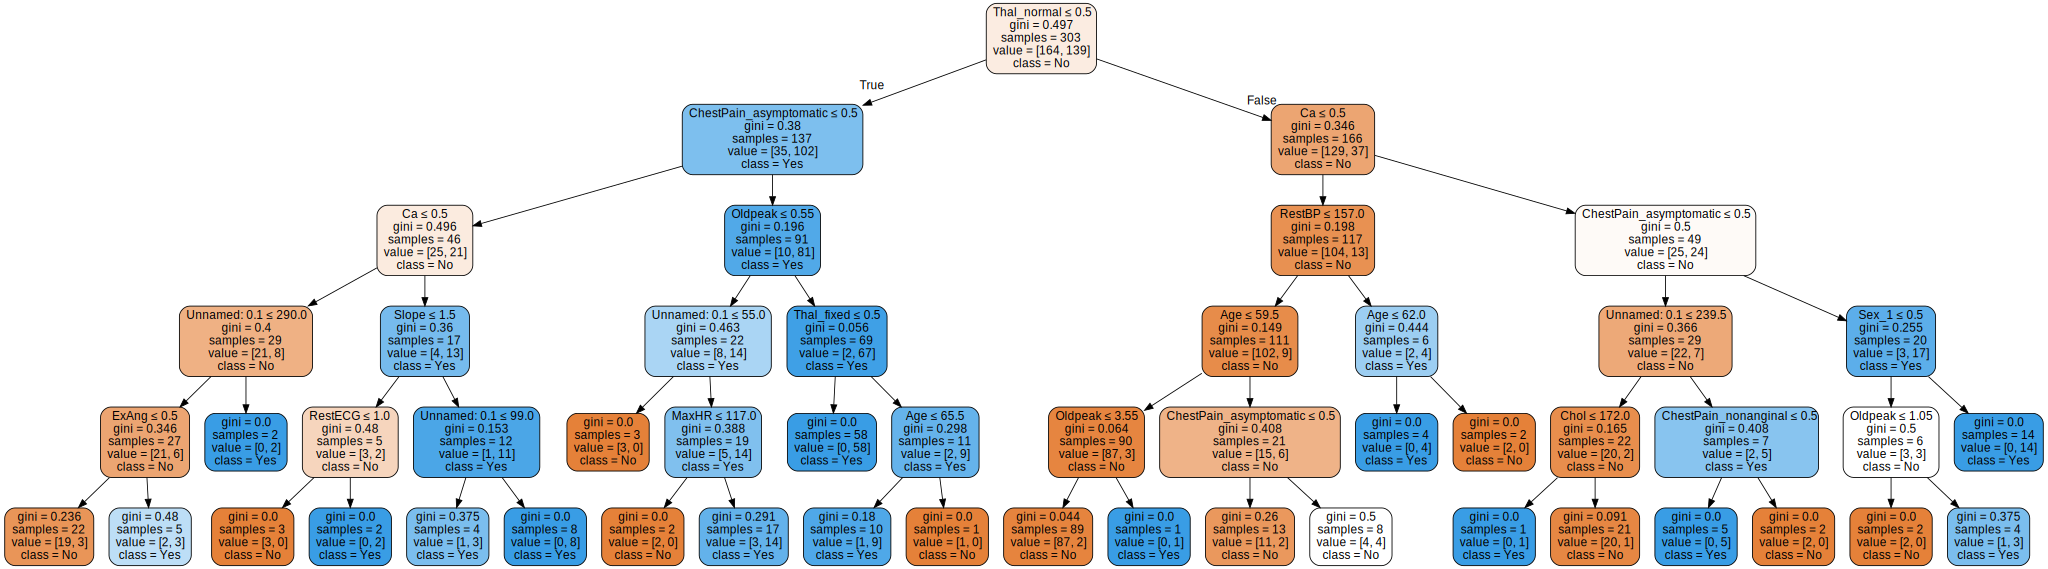

In [91]:
graph #the depth is upto 5. It means a node stops spliting at depth 5 even though the node is not pure.

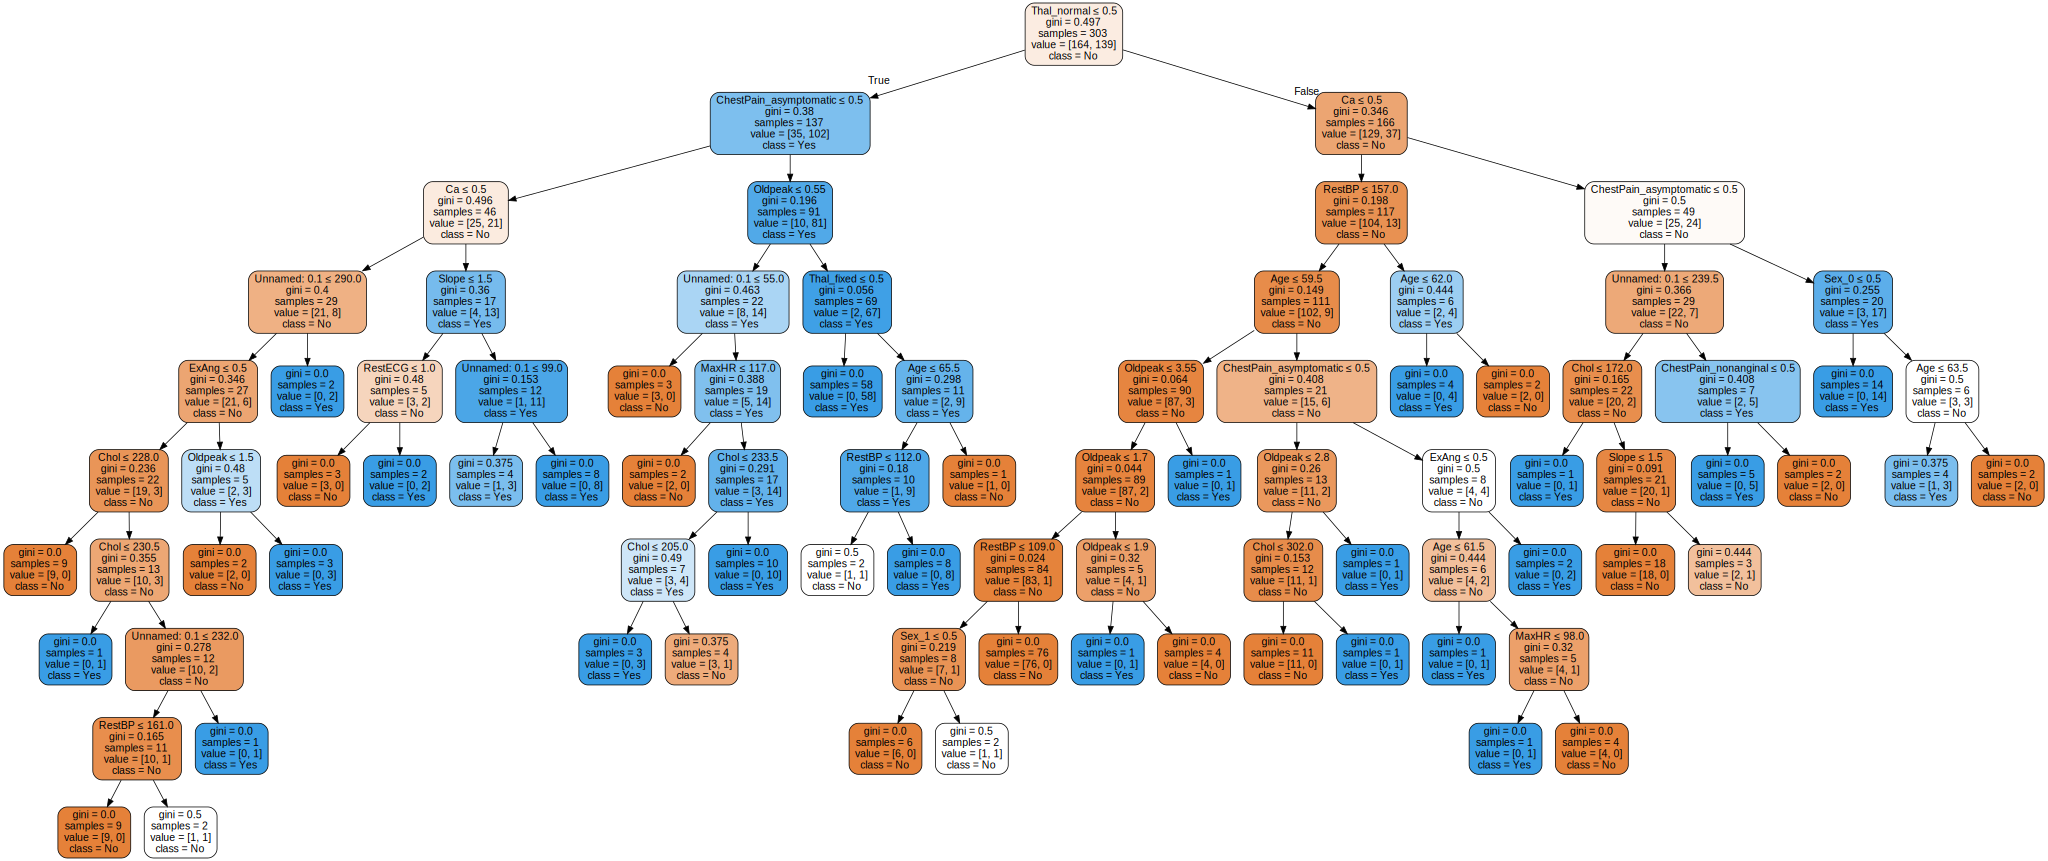

In [95]:
clf = DecisionTreeClassifier(min_samples_split=5)
clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=new_cat_features,class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

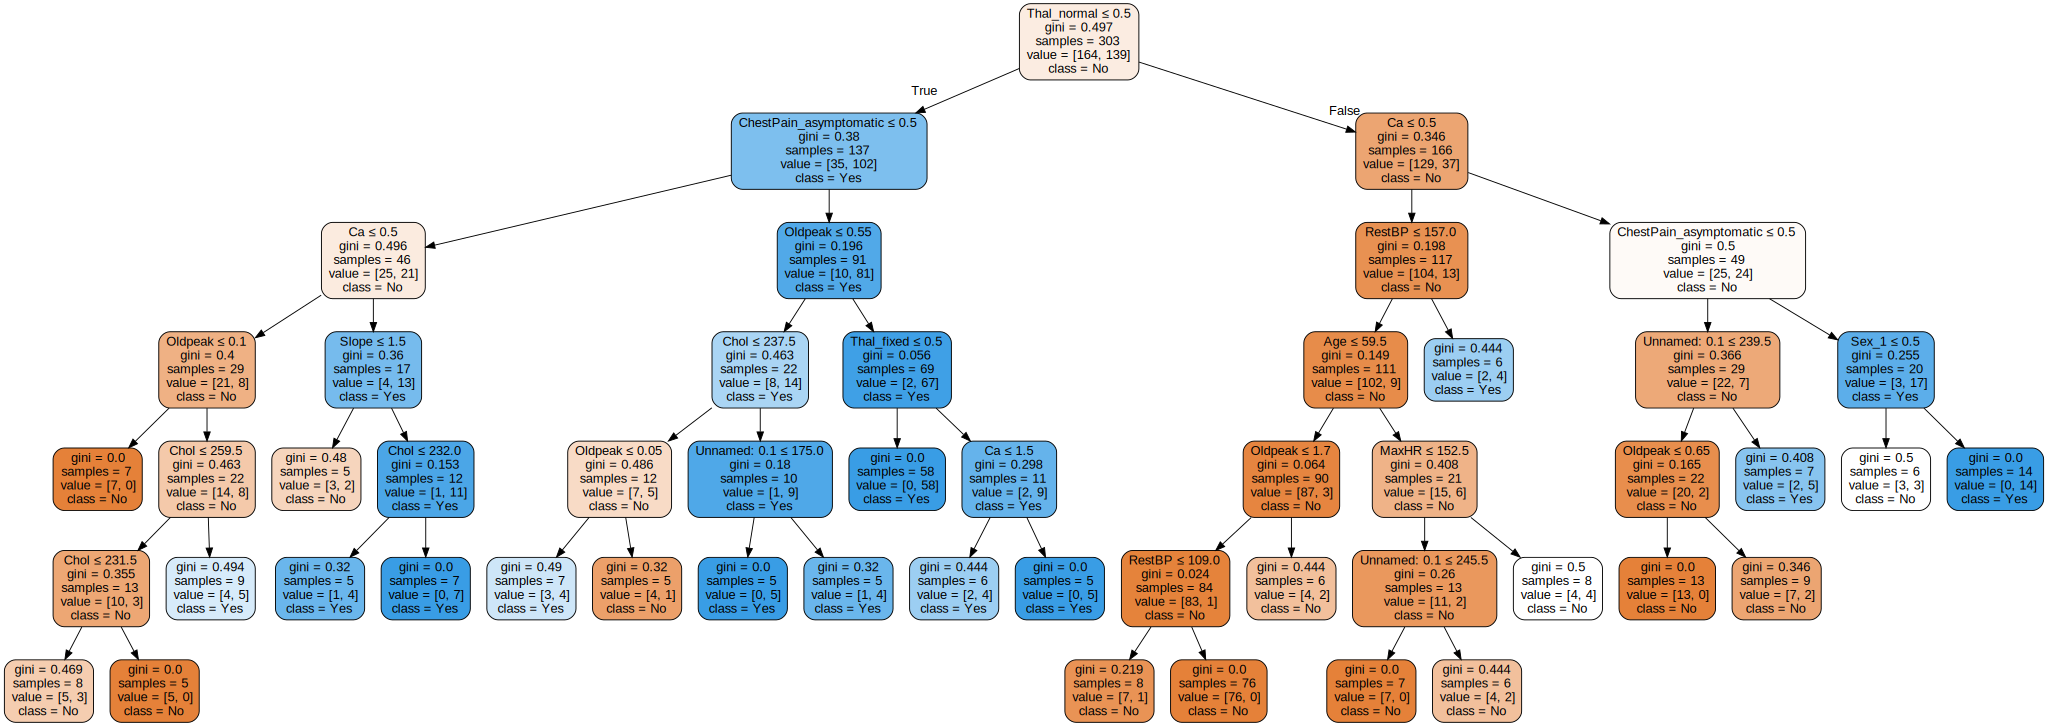

In [97]:
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=new_cat_features,class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph
#In this case, the tree split such that the samples in the leaf nodes are at least 5.

### 2. Pick a performance metric (for classification) and optimize those tuning parameters. Does a tree perform better when fully grown or early stopped using those parameters?

In [ ]:
#Specify the parameter space (max_depth, min_sample_split, min_samples_leaf)
param_space={
'max_depth' : [3, 5, 7, 9, None],
'min_samples_split' : [2, 3, 5],
'min_samples_leaf' : [1, 2, 3, 5],
'max_features' : [4, 8, None]}

In [ ]:
# sklearn has a convenient function that can do grid search, as well as cross validation.
# see more in https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, param_space, cv=5) #here, cv is taken care of by 5-fold cross validation internally.
#If you want to use different types of cv (e.g. stratified- which also takes care of class label imbalance), you can construct cv object.
# see more in https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
# and https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [ ]:
clf.fit(X ,y) #note that I didn't divide X into X_train and X_test, since I'm doing cross validation anyway, but if you want to make sure to test, you may set aside X_test for testing. 

In [ ]:
clf.best_estimator_ #you can call the best performing estimator

In [ ]:
clf.best_params_ #directly shows best hyperparameters

In [ ]:
clf.cv_results_ #you can see the full result from cross validation